# Analysis of borrower APR, loan amount, loan status and investors on Prosper loan data
## by Vaibhav Gupta

## Investigation Overview

In this investigation, my primary goals were to find out the factors affecting borrower APR, loan status and number of investors for different loans. I was also interested in finding the differences among loans based on the loan amount.

## Dataset Overview

The original dataset consisted of 113,937 different loans with 81 variables on each loan. I investigated only the following ten variables in my exploratory analysis:  Term, LoanStatus, BorrowerAPR, BorrowerRate, EmploymentStatusDuration, AmountDelinquent, IncomeVerifiable, StatedMonthlyIncome, LoanOriginalAmount, and Investors. Some rows in the dataset had to be removed due to the presence of outliers in the variables 'AmountDelinquent' and 'StatedMonthlyIncome'.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
# load in the dataset into a pandas dataframe
df_loandata = pd.read_csv('loandata_trimmed.csv')

## Distribution of borrower APR

BorrowerAPR follows a bimodal distribution with first peak near 0.2 and second near 0.33. Most of the values fall between 0.1 and 0.2.

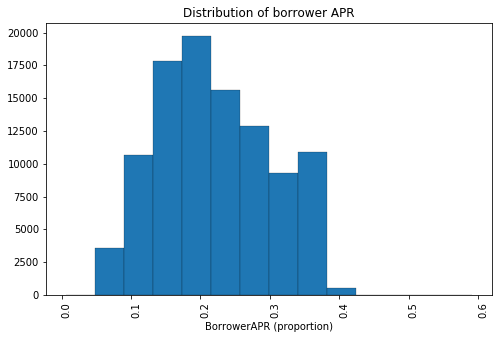

In [7]:
def generate_hist(var, varunit, titlename):
    plt.figure(figsize=[8, 5])
    bins = np.arange(min(df_loandata[var]), max(df_loandata[var])+0.2, (max(df_loandata[var])-min(df_loandata[var]))/10)
    plt.hist(data = df_loandata, x = var, bins = bins, linewidth=0.2, edgecolor='black')
    plt.xlabel('{} ({})'.format(var, varunit))
    plt.xticks(rotation=90, ha="right", rotation_mode="anchor")
    plt.title(titlename)
    
generate_hist('BorrowerAPR', 'proportion', 'Distribution of borrower APR')    

## Distribution of original loan amount

LoanOriginalAmount is trimodal with three peaks around 1000, 15000 and 25000. There are a few values which fall in the range 30000 to 35000.

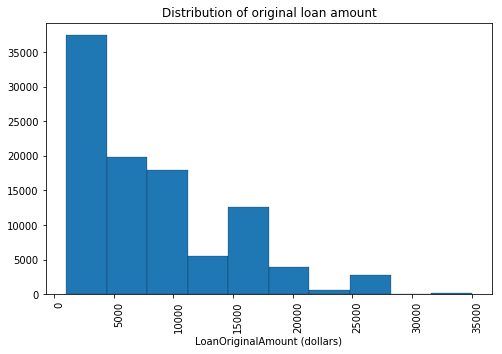

In [8]:
generate_hist('LoanOriginalAmount', 'dollars', 'Distribution of original loan amount') 

## Distribution of investors

The distribution for the number of investors is skewed towards the right, with most of the values less than 220. There are very few loans with the number of investors exceeding 600.

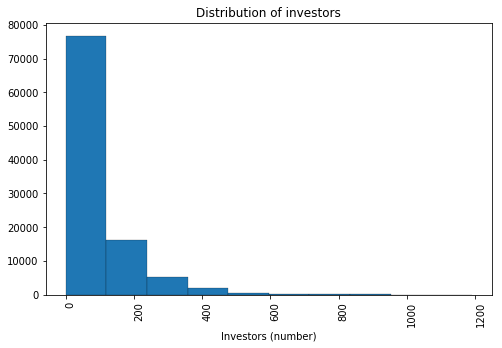

In [10]:
generate_hist('Investors', 'number', 'Distribution of investors') 

## Distribution of loan status

The number of loans having the status of Defaulted or worse are less than 5%. Almost 90% of the loans are either Current or Completed.

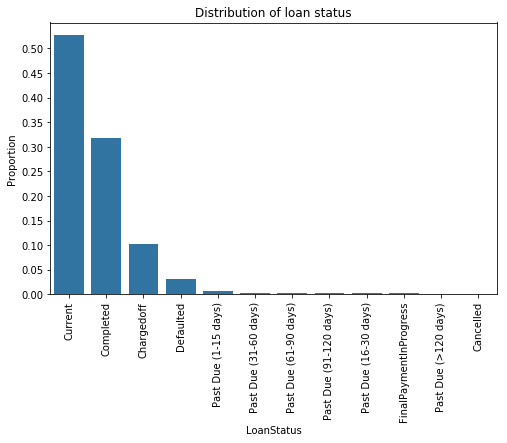

In [13]:
base_color = sb.color_palette()[0]
status_order = df_loandata['LoanStatus'].value_counts().index

# get proportion taken by most common group for derivation of tick marks
n_points = df_loandata.shape[0]
max_count = df_loandata['LoanStatus'].value_counts().max()
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
plt.figure(figsize=[8, 5])
sb.countplot(data = df_loandata, x = 'LoanStatus', color=base_color, order=status_order);
plt.yticks(tick_props * n_points, tick_names);
plt.ylabel('Proportion')
plt.title('Distribution of loan status')
plt.xticks(rotation=90);

## Bivariate analysis of loan status with original loan amount and borrower APR

The loans which are past due tend to have a greater BorrowerAPR in general. The loans which are Completed have the lowest median and Q1 (first quartile) value for BorrowerAPR. The loan amount for status 'Current' is higher compared to other statuses. The loan amount for the status 'Completed' is lower compared to other statuses, which seems intuitive.

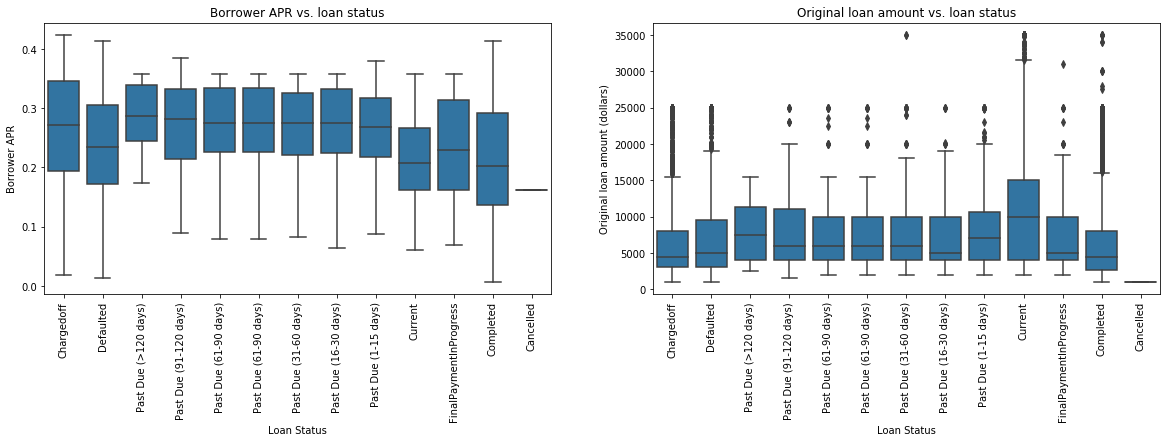

In [24]:
# create the plot
loan_status_order = ['Chargedoff', 'Defaulted', 'Past Due (>120 days)', 'Past Due (91-120 days)',
                     'Past Due (61-90 days)', 'Past Due (61-90 days)', 'Past Due (31-60 days)',
                     'Past Due (16-30 days)', 'Past Due (1-15 days)', 'Current', 'FinalPaymentInProgress',
                     'Completed', 'Cancelled']
    
plt.figure(figsize=[20, 5])

plt.subplot(1, 2, 1)
sb.boxplot(data = df_loandata, x = 'LoanStatus', y = 'BorrowerAPR', color = base_color, order=loan_status_order);
plt.ylabel('Borrower APR')
plt.xlabel('Loan Status')
plt.title('Borrower APR vs. loan status')
plt.xticks(rotation=90);

plt.subplot(1, 2, 2)
sb.boxplot(data = df_loandata, x = 'LoanStatus', y = 'LoanOriginalAmount', color = base_color, order=loan_status_order);
plt.ylabel('Original loan amount (dollars)')
plt.xlabel('Loan Status')
plt.title('Original loan amount vs. loan status')
plt.xticks(rotation=90);

## Multivariate analysis of loan status with original loan amount and borrower APR

The loans in the 'Past Due' (any number of days) status have a BorrowerAPR less than 0.4. Most of the loans which are past due have a loan amount less than 25000, with only two loans with loan amount approximately 35000. The loans with an amount greater than 25000 and BorrowerAPR of approximately 0.2 or less are mostly in the 'Current', 'FinalPaymentInProgress', or 'Completed' status. 

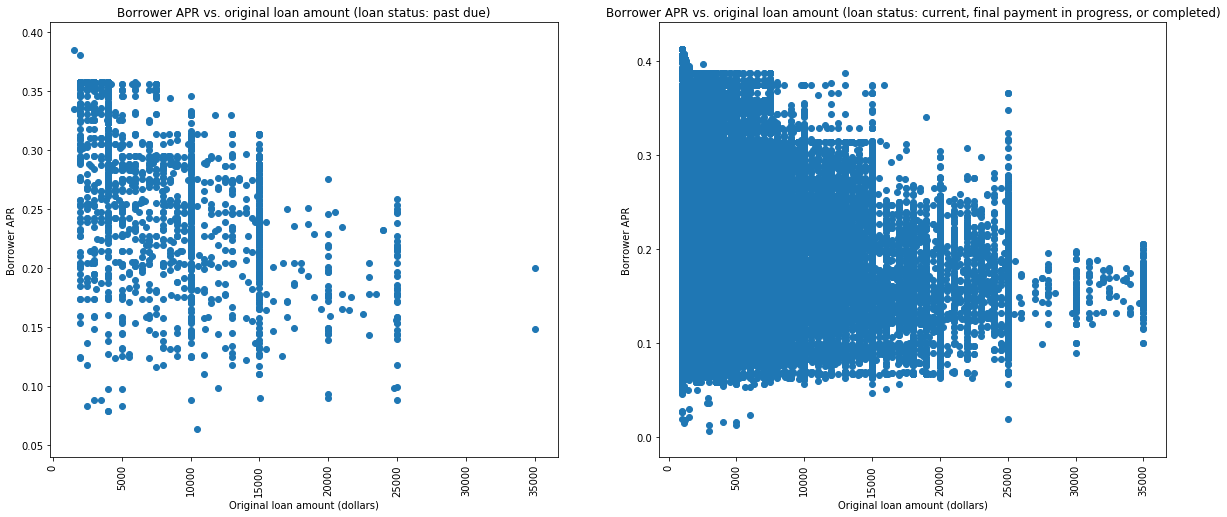

In [22]:
# Create a new data frame with loans which are past due
df_loanstatus_past_due = df_loandata[(df_loandata['LoanStatus'] != 'Chargedoff') & 
                                     (df_loandata['LoanStatus'] != 'Defaulted') &
                                    (df_loandata['LoanStatus'] != 'Current') &
                                    (df_loandata['LoanStatus'] != 'FinalPaymentInProgress') &
                                    (df_loandata['LoanStatus'] != 'Completed') &
                                    (df_loandata['LoanStatus'] != 'Cancelled')]

# Create a new data frame with loans which are current, final payment in progress, or completed
df_loanstatus_goodstat = df_loandata[(df_loandata['LoanStatus'] == 'Current') |                                      
                                    (df_loandata['LoanStatus'] == 'Completed') |
                                    (df_loandata['LoanStatus'] == 'FinalPaymentInProgress')]
# create the plot
plt.figure(figsize=[20, 8])

plt.subplot(1, 2, 1)
plt.scatter(data=df_loanstatus_past_due, x='LoanOriginalAmount', y='BorrowerAPR')
plt.ylabel('Borrower APR')
plt.xlabel('Original loan amount (dollars)')
plt.title('Borrower APR vs. original loan amount (loan status: past due)')
plt.xticks(rotation=90);

plt.subplot(1, 2, 2)
plt.scatter(data=df_loanstatus_goodstat, x='LoanOriginalAmount', y='BorrowerAPR')
plt.ylabel('Borrower APR')
plt.xlabel('Original loan amount (dollars)')
plt.title('Borrower APR vs. original loan amount (loan status: current, final payment in progress, or completed)')
plt.xticks(rotation=90);

## Investors vs. Borrower APR for different original loan amounts

The number of investors seems to decrease with an increase in borrower APR. There are a large number of investors for borrowerAPR in the range 0.1 to 0.2. The number of investors also increases when the original loan amount is higher. 

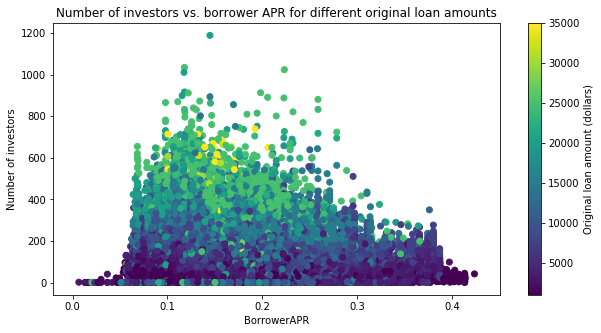

In [27]:
plt.figure(figsize=[10, 5])
plt.scatter(data = df_loandata, x = 'BorrowerAPR', y = 'Investors', c = 'LoanOriginalAmount')
plt.ylabel('Number of investors')
plt.xlabel('BorrowerAPR')
plt.title('Number of investors vs. borrower APR for different original loan amounts')
cbar = plt.colorbar()
cbar.set_label('Original loan amount (dollars)')